#### Shrikant Kale - 301150258

#### Lab 3 - Variational Autoencoders

a. Get the data:
1. Import and load the 'fashion_mnist' dataset from TensorFlow. Using 2 dictionaries store the fashion_mnist datasets into train_firstname and test_firstname, where firstname is your firstname. The first 60,000 data samples will be stored in train_firstname directory with keys 'images' and 'labels', which will contain the images and labels for supervised learning. The next 10,000 data samples will be stored in test_firstname directory with keys 'images' and 'labels', which will contain the images and labels for supervised learning

In [127]:
#importing libraries
import tensorflow as tf
import numpy as np
import keras
from keras.layers import Conv2D, Conv2DTranspose, Input, Flatten, Dense, Lambda, Reshape
from keras.models import Model
from keras.datasets import mnist
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

In [128]:
#getting the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

#loading the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#creating dictionaries to store dataset
train_shrikant = {}
test_shrikant = {}

#storing training images in dictionary train_shrikant
train_shrikant['images'] = train_images
train_shrikant['labels'] = train_labels

#storing testing images and labels in dictionary test_shrikant
test_shrikant['images'] = test_images
test_shrikant['labels'] = test_labels

b. Data Pre-preprocessing
1. Normalize the pixal values in the dataset to a range between 0-1. Store result back into unsupervised_firstname['images'] and supervised_firstname['images']
2. Display (print) the shape of the train_firstname['images'], test_firstname['images'].

In [129]:
from keras.utils import to_categorical

#normalize the supervised and unsupervised data to range between 0 and 1
train_shrikant['images'] = train_shrikant['images'] / 255
test_shrikant['images'] = test_shrikant['images'] / 255


#Display shapes
print("Shape of training image dataset", train_shrikant['images'].shape)
print("Shape of testing image dataset", test_shrikant['images'].shape)
print("Shape of training labels", train_shrikant['labels'].shape)
print("Shape of testing labels ", test_shrikant['labels'].shape)

Shape of training image dataset (60000, 28, 28)
Shape of testing image dataset (10000, 28, 28)
Shape of training labels (60000,)
Shape of testing labels  (10000,)


c. Build Variational Autoencoder with latent dimension size of 2
1. Implement a customer layer named SampleLayer that extends the tf.keras.layers.layer class. The customer layer will sample the latent space of the encoder for the decoder. For more info checkout: https://www.tensorflow.org/tutorials/customization/custom_layers
i. The call function takes as input the mean and standard deviation as a list. From one of the input use tf.shape to calculate the batch size and dimension of the input. Generate random noise with the
sample dimension as the batch size and dimension of the input from a standard normal distribution using tf.keras.backend.random_normal. Generate samples z using the following formula:
𝑧 = 𝜇 + 𝜎 ⨀ 𝜖
where 𝜇 𝑎𝑛𝑑 𝜎 are the mean and standard deviation from the input and 𝜖 is the generated random noise.

In [130]:
class SampleLayer(tf.keras.layers.Layer):
    def call(self, args):
        z_mean, z_log_sigma = args
        batch = K.shape(z_mean)[0]
        dim = K.int_shape(z_mean)[1]
        epsilon = K.random_normal(shape =(batch, dim))
        return z_mean + K.exp(0.5 * z_log_sigma) * epsilon

2. Use TensorFlow's Model() [For more info, reference: https://www.tensorflow.org/api_docs/python/tf/keras/Model] to build
the encoder section of the variational autoencoder with the following architecture:
i. Input = Size of input image, store the layer as input_img
ii. Layer 1 = Convolution with 32 kernels with window size 3x3, a 'relu' activation function, and 'same' padding
iii. Layer 2 = Convolution with 64 kernels with window size 3x3, a 'relu' activation function, 'same' padding, stride of 2x2
iv. Layer 3 = Convolution with 64 kernels with window size 3x3, a 'relu' activation function, and 'same' padding
v. Layer 4 = Convolution with 64 kernels with window size 3x3, a 'relu' activation function, and 'same' padding
vi. Layer 5 = Full connected layer with 32 neurons and 'relu' activation (Note: Input to fully connected layer should be flatten first)
vii. LatentSpace.A = Full connected layer with 2 neurons, store layer as z_mu_firstname
viii. LatentSpace.B = Full connected layer with 2 neurons, store layer as z_log_sigma_firstname
ix. Output = SampleLayer defined Step C.1, store layer as z_firstname

In [131]:
latent_dim = 2 # Number of latent dim parameters

image_size = train_shrikant['images'].shape[1]
input_img = Input(shape=(image_size, image_size, 1),)

layer1 = Conv2D(32, kernel_size=3, activation='relu', padding="same")(input_img)
layer2 = Conv2D(64, kernel_size=3, activation='relu', padding='same',strides=2)(layer1)
layer3 = Conv2D(64, kernel_size=3, activation='relu', padding='same')(layer2)
layer4 = Conv2D(64, kernel_size=3, activation='relu', padding='same')(layer3)

conv_shape = K.int_shape(layer4)

x = Flatten()(layer4)
layer5 = Dense(32, activation='relu')(x)

z_mu_shrikant = Dense(latent_dim)(layer5)  #Mean values of encoded input
z_log_sigma_shrikant = Dense(latent_dim)(layer5)  #Std dev. (variance) of encoded input

z_shrikant = SampleLayer()([z_mu_shrikant, z_log_sigma_shrikant])

encoder_shrikant = Model(input_img, [z_mu_shrikant, z_log_sigma_shrikant, z_shrikant])
print(encoder_shrikant.summary())

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_56 (Conv2D)             (None, 28, 28, 32)   320         ['input_13[0][0]']               
                                                                                                  
 conv2d_57 (Conv2D)             (None, 14, 14, 64)   18496       ['conv2d_56[0][0]']              
                                                                                                  
 conv2d_58 (Conv2D)             (None, 14, 14, 64)   36928       ['conv2d_57[0][0]']              
                                                                                            

3. Display (print) a summary of the model using summary(). Draw a diagram illustrating the structure of the neural network model, making note of the size of each layer (# of neurons), number of weights in each layer and the unique connection between the latent space layer and the sample output layer.

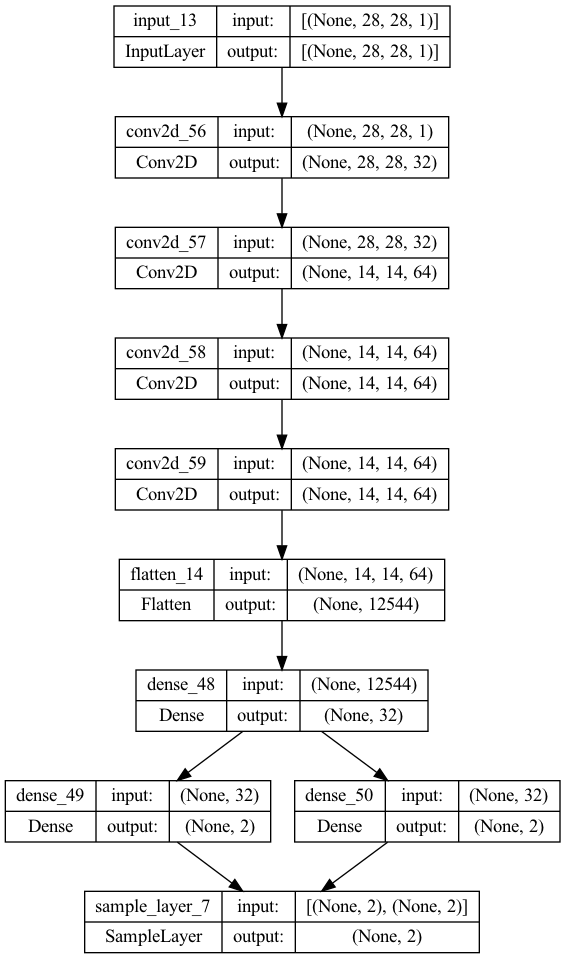

In [132]:
from tensorflow.keras.utils import plot_model

tf.keras.utils.plot_model(encoder_shrikant, show_shapes=True, show_layer_names=True)

4. Use TensorFlow's Model() [For more info, reference: https://www.tensorflow.org/api_docs/python/tf/keras/Model] to build the decoder section of the variational autoencoder (store as decoder_firstname) with the following architecture:
i. Input = Size of latent dimension
ii. Layer 1 = Fully connected layer, the number of neurons should be same as the output shape of Layer 4 in the encoder (i.e. the flatten input dimension for layer 5)
iii. Layer 2 = Use tf.keras.layers.reshape to reshape the tensor as an image. The dimension of the reshape should be the same as Layer 4 in the encoder
iv. Layer 3 = Use tf.keras.layers.Conv2DTranspose to add a transposed convolution layer with 32 kernels with window size 3x3, a 'relu' activation function, 'same' padding, stride of 2x2. For more info, reference: https://keras.io/api/layers/convolution_layers/convolution2d_transpose/
v. Layer 4 = Convolution with 1 kernels with window size 3x3, a sigmoid activation function, and 'same' padding

In [133]:

# decoder takes the latent vector as input
decoder_input = Input(shape=(latent_dim, ))

layer1 = Dense(conv_shape[1]*conv_shape[2]*conv_shape[3], activation='relu')(decoder_input)
# reshape to the shape of last conv. layer in the encoder
layer2 = Reshape((conv_shape[1], conv_shape[2], conv_shape[3]))(layer1)
# upscale (conv2D transpose) back to original shape
# use Conv2DTranspose to reverse the conv layers defined in the encoder
layer3 = Conv2DTranspose(32, kernel_size=3, padding='same', activation='relu',strides=(2, 2))(layer2) 
#Using sigmoid activation
layer4 = Conv2DTranspose(1, kernel_size=3, padding='same', activation='sigmoid')(layer3)

# Define and summarize decoder model
decoder_shrikant = Model(decoder_input, layer4, name='decoder')
decoder_shrikant.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_51 (Dense)            (None, 12544)             37632     
                                                                 
 reshape_6 (Reshape)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_transpose_7 (Conv2DT  (None, 28, 28, 32)       18464     
 ranspose)                                                       
                                                                 
 conv2d_transpose_8 (Conv2DT  (None, 28, 28, 1)        289       
 ranspose)                                                       
                                                                 
Total params: 56,385
Trainable params: 56,385
Non-trainable

5. Display (print) a summary of the model using summary(). Draw a diagram illustrating the structure of the neural network model, making note of the size of each layer (# of neurons), number of weights in each layer.

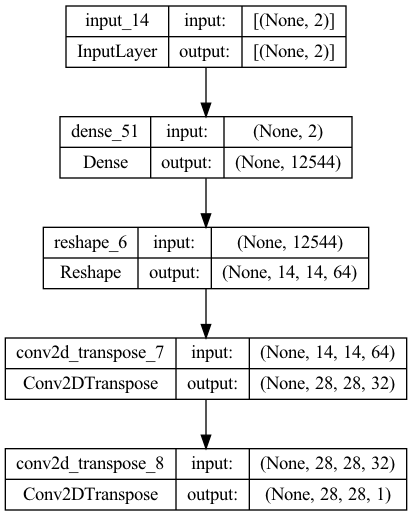

In [134]:
from tensorflow.keras.utils import plot_model

tf.keras.utils.plot_model(decoder_shrikant, show_shapes=True, show_layer_names=True)

6. Use TensorFlow's Model() [For more info, reference: https://www.tensorflow.org/api_docs/python/tf/keras/Model] to build a variational autoencoders (store model as vae_firstname) from the input layer of the encoder in Step C.2.i and output of the decoder(Note: use built model decoder_firstname from C.4 and z_firstname from Step C.2 to define output y, which will be the output of the variational autoencoder)
7. Display (print) a summary of the model using summary(). Draw a diagram illustrating the structure of the neural network model, making note of the size of each layer (# of neurons), number of weights in each layer.

In [135]:
y = decoder_shrikant(encoder_shrikant(input_img)[2])
vae_shrikant = Model(input_img, y, name='vae')
vae_shrikant.summary()


Model: "vae"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 model_7 (Functional)        [(None, 2),               494244    
                              (None, 2),                         
                              (None, 2)]                         
                                                                 
 decoder (Functional)        (None, 28, 28, 1)         56385     
                                                                 
Total params: 550,629
Trainable params: 550,629
Non-trainable params: 0
_________________________________________________________________


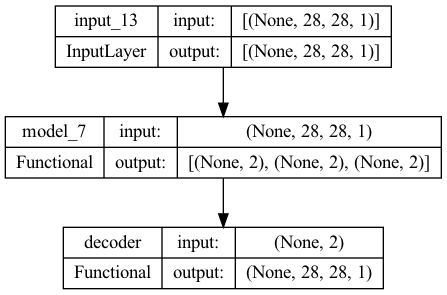

In [136]:
tf.keras.utils.plot_model(vae_shrikant, show_shapes=True, show_layer_names=True)

d. Define the KL divergence using the following line, making sure to replace z_mu and z_log_sigma, as defined from Step C.2:

In [137]:
kl_loss = -0.5 * tf.reduce_mean(z_mu_shrikant - tf.square(z_mu_shrikant) - tf.exp(z_log_sigma_shrikant) + 1)
kl_loss *= 0.5

e. Use model.add_loss() to add the KL loss function defined in Step D. For more info reference: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer#add_loss
f. Compile the model with 'adam' optimizer, and 'mean_square_error' loss function
g. Use TensorFlow's fit() and the train_firstname['images' dataset to train the VAE with 10 epochs and batch size of 256.

In [138]:
# Compile VAE
vae_shrikant.add_loss(kl_loss)
vae_shrikant.compile(optimizer='adam', loss='mean_squared_error')


In [139]:
# Train autoencoder
vae_shrikant.fit(train_shrikant['images'],train_shrikant['images'], epochs = 10, batch_size=256)

Epoch 1/10


2022-11-19 16:27:49.924221: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 39s 117ms/step - loss: -0.1850
Epoch 2/10
235/235 [==============================] - 23s 96ms/step - loss: -0.2461
Epoch 3/10
235/235 [==============================] - 23s 98ms/step - loss: -0.2557
Epoch 4/10
235/235 [==============================] - 23s 96ms/step - loss: -0.2581
Epoch 5/10
235/235 [==============================] - 22s 96ms/step - loss: -0.2593
Epoch 6/10
235/235 [==============================] - 23s 98ms/step - loss: -0.2620
Epoch 7/10
235/235 [==============================] - 22s 95ms/step - loss: -0.2629
Epoch 8/10
235/235 [==============================] - 23s 96ms/step - loss: -0.2647
Epoch 9/10
235/235 [==============================] - 23s 96ms/step - loss: -0.2652
Epoch 10/10
235/235 [==============================] - 22s 95ms/step - loss: -0.2662


h. Review sample code below and generate 10x10 samples from the VAE model using the decoder.

2022-11-19 16:31:46.404314: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 16ms/step


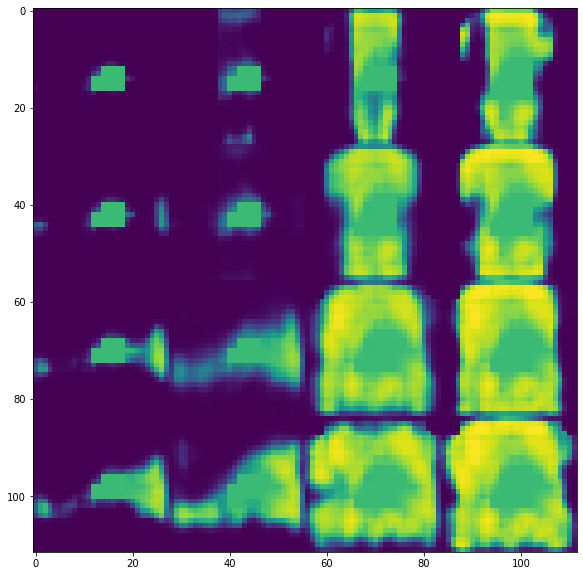

In [140]:
n = 4
figure_size = 28

figure = np.zeros((figure_size * n, figure_size * n))

grid_x = np.linspace(0.05, 0.95, n)
grid_y = np.linspace(0.05, 0.95, n)


for i, yi in enumerate(grid_y):
    for j, xi in enumerate(grid_x):
        z_sample = np.array([[xi, yi]])

        x_decoded = decoder_shrikant.predict(z_sample)
        img = x_decoded[0].reshape(28, 28)
        figure[i * figure_size: (i + 1) * figure_size,
               j * figure_size: (j + 1) * figure_size] = img

plt.figure(figsize=(10, 10))

#Reshape for visualization
fig_shape = np.shape(figure)
figure = figure.reshape((fig_shape[0], fig_shape[1]))

plt.imshow(figure)
plt.show()

i. Display (plot) the latent space of z_mu of the test dataset
1. Using TensorFlow's Model() and layers from the encoder (see Step C.2) build a model to generate the latent space for z_mu.
2. Use the model to predict the encoded latent space of the test dataset
3. Use matplotlib.pyplot.scatter to plot the latent space.

2022-11-19 16:31:49.698546: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step


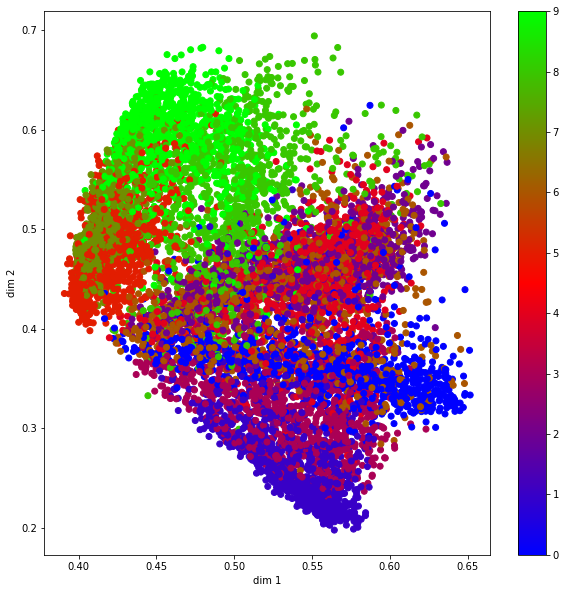

In [141]:
mu, _, _ = encoder_shrikant.predict(test_shrikant['images'])
#Plot dim1 and dim2 for mu
plt.figure(figsize=(10, 10))
plt.scatter(mu[:, 0], mu[:, 1], c=test_shrikant['labels'], cmap='brg')
plt.xlabel('dim 1')
plt.ylabel('dim 2')
plt.colorbar()
plt.show() 